A decision tree is a popular and intuitive machine learning algorithm used for both classification and regression tasks.

It models decisions and their possible consequences in a tree-like structure, where each node represents a decision or a test on a particular attribute, each branch represents an outcome of the decision, and each leaf node represents a class label (for classification) or a predicted value (for regression).



***Why are Decision Trees Used?***  

interpretability

visualization

feature importance

handling non linearity

flexibility

handling missing values

ensemble learning


***Types of decision trees:***

1.classification

Predicting whether an email is spam or not spam based on features like subject, sender, and keywords.

2.regression


Predicting the price of a house based on features like area, number of bedrooms, and location.

In [35]:
# classification decision tree
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
carbon = pd.read_csv("seeds.csv")
carbon.head(4)

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0


In [37]:
#carbon['group'].value_counts(dropna=False)

In [38]:
#carbon['category'].value_counts(dropna=False)

In [39]:
# one hot encoding

#carbon['group'] = carbon['group'].replace({'drinks':1,'fruits, vegetables, pulses and oilseeds':2,'cereal products':3,'starters and mixed dishes':4,'culinary aids and various ingredients':5,'baby food':6,'sweet products':7,'meat, eggs, fish':8})
#carbon
#carbon['category'] = carbon['category'].replace({'water':1,'vegetables':2,'soft drinks':3,'fruits':4,'soups':5,'pulses':6,'bread and viennoiseries':7,'pasta, rice and cereals':8,'potatoes and other tubers':9,'flour and pie dough':10,'various ingredients':11,'herbs':12,'mixed dishes':13,'salt':14,'sugar and honey':15,'small salted pots and infant dishes':16,'sauces':17,'baby deserts':18,'milk and baby drinks':19,'spices':20,'meat substitutes':21,'culinary aids':22})
#carbon

In [41]:
X = (carbon[['perimeter', 'compactness','asymmetry_coefficient','asymmetry_coefficient']])
y= (carbon[['species']])

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
y_pred = clf.predict(X_test)

In [46]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 84.12698412698413 %


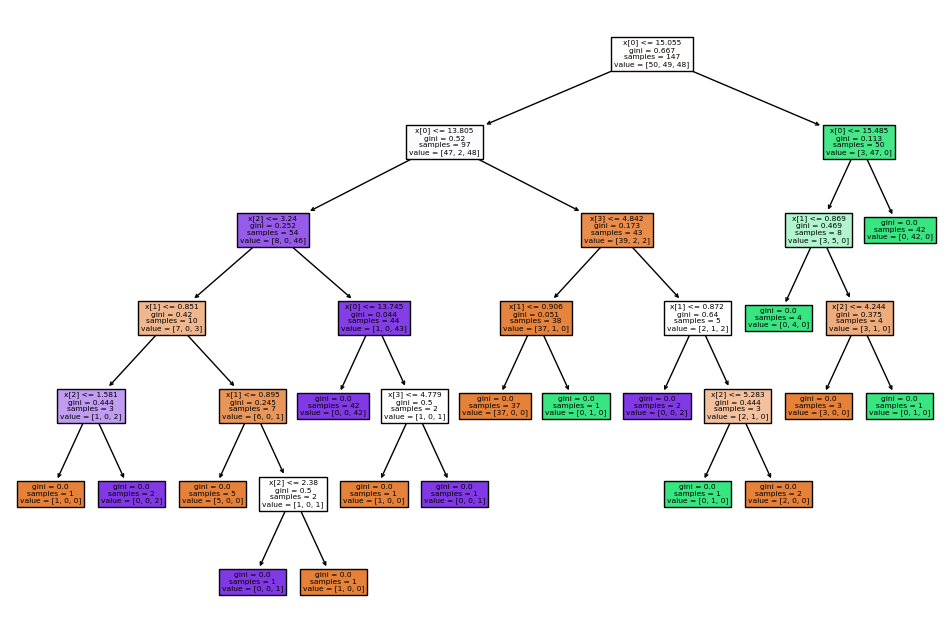

In [47]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True)
plt.show()

In [58]:
tree = clf.tree_

# Access Gini impurity of each node in the tree
gini_values = tree.impurity

# in scikit-learn, directly displaying the Gini impurity values for each node in a Decision Tree is not directly supported as an attribute of the trained tree model.
# same is for entropy and information gain

***Nodes and Features:***

Root Node: Represents the entire dataset, split based on the most important feature.

Internal Nodes: Show splits based on different features and their conditions.

Leaf Nodes: Terminal nodes indicating the predicted class or class probabilities.


***Key Elements to Analyze:***

Feature Importance: Features higher in the tree are more critical in making decisions.

Splitting Conditions: Understand the conditions that split the dataset at each node (e.g., if a condition is met, it goes left; otherwise, it goes right).


Class Distribution: In each node, observe the class distribution (or class probabilities) to determine the predicted class or the probabilities of each class.


Gini Impurity or Entropy: Measure of impurity at each node. Lower values indicate purer nodes with more homogeneity in class distribution.
Decision Paths: Follow paths from the root to leaves to understand how decisions are made based on feature conditions.


***Interpretation Tips:***  

Feature Importance: Look for features higher in the tree; they are more influential in predicting the target.

Nodes with Low Impurity: Nodes with lower Gini impurity or entropy values are more homogeneous in terms of class distribution.

Majority Class: In leaf nodes, identify the majority class. It's often the predicted class for samples that reach that node.

Depth of the Tree: Deeper trees may capture complex patterns but might also indicate overfitting.

Decision Rules: Understand the decision paths and the rules the tree uses to classify samples.

.
.
.
.

If the root node splits on a particular feature, it's likely significant for predictions.

Leaf nodes with a predominant class indicate strong predictions for that class.

Analyze the splits and conditions to understand how the model classifies different samples.

In [48]:
# regression tree
from sklearn.tree import DecisionTreeRegressor

In [49]:
reg = DecisionTreeRegressor()

In [50]:
reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [51]:
y_pred = reg.predict(X_test)

In [52]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 0.2222222222222222


In [53]:
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.3492063492063492


In [54]:
print("Root Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred, squared=False))

Root Mean Squared Error: 0.5909368402852788


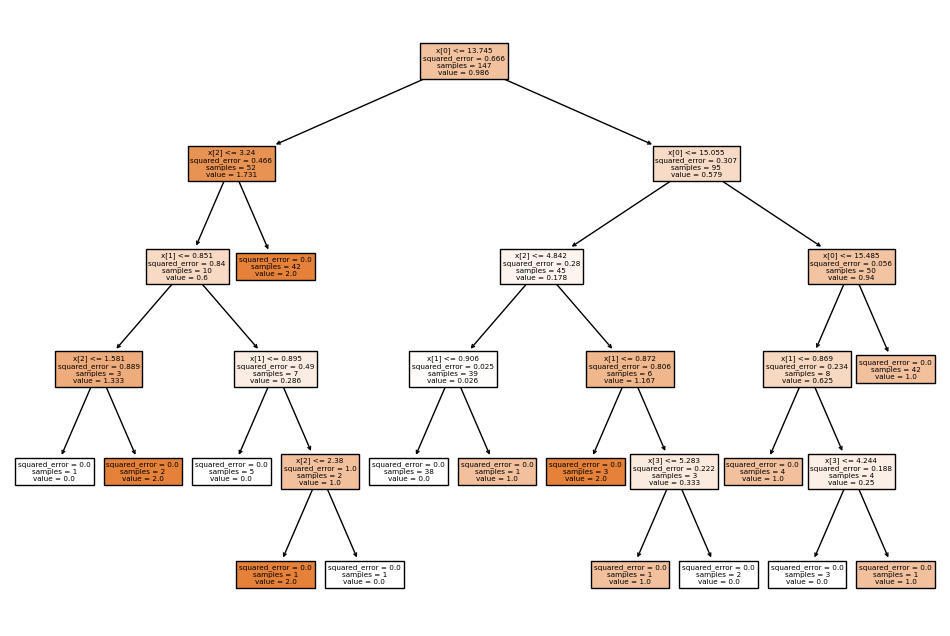

In [55]:
plt.figure(figsize=(12, 8))
plot_tree(reg, filled=True)
plt.show()

Observing a regression decision tree plot involves understanding how the model makes predictions and the structure of the tree. Here's how to interpret a regression decision tree plot:

***Nodes and Features:***

Root Node: Represents the entire dataset, split based on the most important feature.

Internal Nodes: Show splits based on different features and their conditions.

Leaf Nodes: Terminal nodes indicating the predicted values (regression targets).


***Key Elements to Analyze:***

Feature Importance: Features higher in the tree are more critical in making decisions.

Splitting Conditions: Understand the conditions that split the dataset at each node (e.g., if a condition is met, it goes left; otherwise, it goes right).

Predicted Values: In each leaf node, observe the predicted regression values. These are the predicted outcomes for samples that reach that node.

Mean or Median Values: Some nodes might display mean or median values instead of individual predictions, representing the average or median target values in that node.


***Interpretation Tips:***

Feature Importance: Features higher in the tree are more influential in making predictions.

Nodes with Pure Values: Leaf nodes with consistent or similar predicted values indicate a homogeneous subset of data.

Depth of the Tree: Deeper trees capture more complex relationships in the data but may also lead to overfitting.

Outliers Handling: Decision trees are susceptible to overfitting with outliers, which might lead to specific nodes capturing such extreme values.

.
.
.
.

Example Interpretation:

Follow the decision paths from the root to leaves to understand how the model arrives at specific predictions.

Leaf nodes with similar predicted values represent subsets of data with similar outcomes.

Analyze the splits and conditions to understand how the model segments the data based on feature values.

Understanding the regression decision tree plot helps in grasping how the model processes features to predict continuous values.